In [89]:
import pandas as pd
import matplotlib.pyplot as plt


In [90]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/bookings.csv'
df = pd.read_csv(url)


In [91]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   city      729 non-null    object
 1   ds        729 non-null    object
 2   bookings  729 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 17.2+ KB


In [92]:
df.head()

,city,ds,bookings
0,City_2,01/01/2013,69
1,City_2,01/02/2013,101
2,City_2,01/03/2013,134
3,City_2,01/04/2013,155
4,City_2,01/05/2013,104


In [93]:
# df.stack(level="city").reindex
# df = df.pivot(index = "ds", columns='city', values=['bookings']).reset_index()
# df


ds bookings       
city               City_1 City_2
0     01/01/2013     16.0   69.0
1     01/02/2013     20.0  101.0
2     01/03/2013     15.0  134.0
3     01/04/2013     22.0  155.0
4     01/05/2013     16.0  104.0
..           ...      ...    ...
360      9/26/13     65.0  317.0
361      9/27/13     44.0  296.0
362      9/28/13     51.0  208.0
363      9/29/13     55.0  233.0
364      9/30/13     66.0  290.0

[365 rows x 3 columns]

In [94]:
df['dates'] = pd.to_datetime(df['ds'],infer_datetime_format=True)

In [95]:
# need to include a missing value check, and a count to see that we should have a missing value,
# so group then count to see how many valuses there are
# count here to see how many values, probably use a groupby comment



In [96]:
df


ds bookings             dates
city               City_1 City_2           
0     01/01/2013     16.0   69.0 2013-01-01
1     01/02/2013     20.0  101.0 2013-01-02
2     01/03/2013     15.0  134.0 2013-01-03
3     01/04/2013     22.0  155.0 2013-01-04
4     01/05/2013     16.0  104.0 2013-01-05
..           ...      ...    ...        ...
360      9/26/13     65.0  317.0 2013-09-26
361      9/27/13     44.0  296.0 2013-09-27
362      9/28/13     51.0  208.0 2013-09-28
363      9/29/13     55.0  233.0 2013-09-29
364      9/30/13     66.0  290.0 2013-09-30

[365 rows x 4 columns]

In [75]:
dfp=df.pivot(index = "dates", columns='city', values='bookings')


In [76]:
# check for missing numbers, so do we have the correct numbers of values
# need to work out how to list where the missing value is and show the effects of the different ways to remove the missing value
# replace forward, interpolate etc.

# count number of missing values

print(dfp.isna().sum())

# dfp[dfp['City_2'].isna()] # I know the missing cell is in the city 2 data
dfp[dfp.isna().any(axis=1)] # better expression to use, pick up all the missing date.


city
City_1    0
City_2    1
dtype: int64


city,City_1,City_2
dates,,
2013-06-24,40.0,NaN


In [77]:
dfp = dfp.fillna(method ='pad') # fill missing data with previous data

dfp.isna().sum()

# dfp.head()

# dfp.loc[(dfp['dates'] == '2013-06-24')]

city
City_1    0
City_2    0
dtype: int64

In [78]:
# now do the calculation bit, rolllign 30 day window with mean and 2* std, apply 2STD both -ve and +ve around the mean and then check
# for crossings. Probably a "neat" way to do this, but least I can follow my calculations 

#City 1

dfp['rollingc1'] = dfp.rolling(30)['City_1'].mean()
dfp['rollingc1_2std'] = dfp.rolling(30)['City_1'].std() *2

dfp['rollingc1_M_+2STD']= dfp['rollingc1'] + dfp['rollingc1_2std']
dfp['rollingc1_M_-2STD']= dfp['rollingc1'] - dfp['rollingc1_2std']

dfp['pTrig1'] = (dfp['City_1'] > dfp['rollingc1_M_+2STD'])

dfp['nTrig1'] = (dfp['City_1'] < dfp['rollingc1_M_-2STD'])

dfp['pTrig1'] = dfp['pTrig1'].astype('int64')*100
dfp['nTrig1'] = dfp['nTrig1'].astype('int64')*50


# City 2

dfp['rollingc2'] = dfp.rolling(30)['City_2'].mean()
dfp['rollingc2_2std'] = dfp.rolling(30)['City_2'].std() *2

dfp['rollingc2_M_+2STD']= dfp['rollingc2'] + dfp['rollingc2_2std']
dfp['rollingc2_M_-2STD']= dfp['rollingc2'] - dfp['rollingc2_2std']

dfp['pTrig2'] = (dfp['City_2'] > dfp['rollingc2_M_+2STD'])

dfp['nTrig2'] = (dfp['City_2'] < dfp['rollingc2_M_-2STD'])

dfp['pTrig2'] = dfp['pTrig2'].astype('int64')*400
dfp['nTrig2'] = dfp['nTrig2'].astype('int64')*50
dfp


city,City_1,City_2,rollingc1,rollingc1_2std,rollingc1_M_+2STD,rollingc1_M_-2STD,pTrig1,nTrig1,rollingc2,rollingc2_2std,rollingc2_M_+2STD,rollingc2_M_-2STD,pTrig2,nTrig2
dates,,,,,,,,,,,,,,
2013-01-01,16.0,69.0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
2013-01-02,20.0,101.0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
2013-01-03,15.0,134.0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
2013-01-04,22.0,155.0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
2013-01-05,16.0,104.0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,55.0,232.0,63.100000,25.898209,88.998209,37.201791,0,0,197.500000,72.657439,270.157439,124.842561,0,0
2013-12-28,63.0,182.0,63.166667,25.886134,89.052801,37.280532,0,0,198.500000,70.869963,269.369963,127.630037,0,0
2013-12-29,55.0,199.0,62.733333,25.986380,88.719713,36.746953,0,0,199.966667,68.939720,268.906387,131.026946,0,0


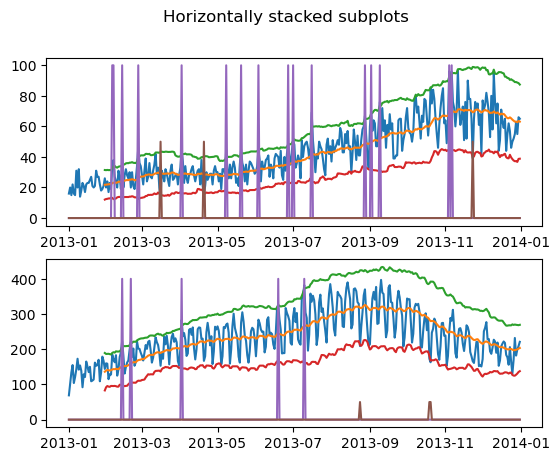

In [84]:
# Plotting time, tried two methods. Like the second one better. 



# ax = plt.gca()
# dfp.plot(kind='line',y='City_1',ax=ax)
# dfp.plot(kind='line',y='rollingc1', color='red', ax=ax)
# dfp.plot(kind='line',y='rollingc1_M_+2STD', color='orange', ax=ax)
# dfp.plot(kind='line',y='rollingc1_M_-2STD', color='orange', ax=ax)
# dfp.plot(kind='line',y='pTrig1', color='black', ax=ax)
# dfp.plot(kind='line',y='nTrig1', color='grey', ax=ax)
# plt.show()

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(dfp['City_1'])
ax1.plot(dfp['rollingc1'])
ax1.plot(dfp['rollingc1_M_+2STD'])
ax1.plot(dfp['rollingc1_M_-2STD'])
ax1.plot(dfp['pTrig1'])
ax1.plot(dfp['nTrig1'])


ax2.plot(dfp['City_2'])
ax2.plot(dfp['rollingc2'])
ax2.plot(dfp['rollingc2_M_+2STD'])
ax2.plot(dfp['rollingc2_M_-2STD'])
ax2.plot(dfp['pTrig2'])
ax2.plot(dfp['nTrig2'])



In [15]:
# dfp.to_csv('outfile.csv')

In [41]:
#trigger will be either  anegative trigger or it will be a positive trigger, it can't be both.
# for two finishing data frames with the trigger points only.
# need to do some column dropping to finish this off, on the ToDo list.

dfp1=dfp[(dfp['nTrig1'] != 0) | (dfp['pTrig1'] != 0)]
dfp2=dfp[(dfp['nTrig2'] != 0) | (dfp['pTrig2'] != 0)]

In [42]:
dfp1.head()

# and export a file so we can see the data in Excel :-)

dfp1.to_csv('outfile1.csv')

